Importing all nescessary packages.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib as plt
import seaborn as sns


Downloading & Printing the dataset

In [2]:
url = 'https://raw.githubusercontent.com/MilanBinsMathew/Software-Defect-Prediction-JM1/main/jm1_csv.csv'

In [3]:
df = pd.read_csv(url)
print(df.head())

df.isnull().sum()

     loc  v(g)  ev(g)  iv(g)  ...  total_Op  total_Opnd  branchCount  defects
0    1.1   1.4    1.4    1.4  ...       1.2         1.2          1.4        0
1    1.0   1.0    1.0    1.0  ...       1.0         1.0          1.0        1
2   72.0   7.0    1.0    6.0  ...     112.0        86.0         13.0        1
3  190.0   3.0    1.0    3.0  ...     329.0       271.0          5.0        1
4   37.0   4.0    1.0    4.0  ...      76.0        50.0          7.0        1

[5 rows x 22 columns]


loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

Shuffling the dataset.
Segementation into training and test set (80% - 20%)
Normalizing the values

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(['defects'], axis =1).values

y = df['defects'].values




Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0,1])
X = scaler.fit_transform(X) 

train_X,test_X,train_Y,test_Y = train_test_split(X, y, test_size=0.2, random_state = 2)





Keras Model Definition

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy

In [7]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, log = {}):
    if log.get('accuracy') > 0.89:
      self.model.stop_training = True

model = Sequential([ 
(Dense(512,activation = 'relu',kernel_initializer='he_uniform',input_shape = (21,))),
(BatchNormalization()),
(Dense(512,activation = 'relu')),

(BatchNormalization()),
(Dense(256,activation = 'relu')),
(Dense(1,activation = 'sigmoid'))
])
ad = RMSprop(learning_rate = 0.01)

call = mycallback()
model.compile(optimizer = ad, loss='binary_crossentropy',metrics = ['accuracy'])

Training

In [8]:
model.fit(x = train_X, y = train_Y, batch_size = 256, epochs = 200, callbacks=  [call])
model.summary()

Epoch 1/200
34/34 [==============================] - 2s 24ms/step - loss: 1.1799 - accuracy: 0.7623
Epoch 2/200
34/34 [==============================] - 1s 24ms/step - loss: 0.5102 - accuracy: 0.8023
Epoch 3/200
34/34 [==============================] - 1s 26ms/step - loss: 0.4856 - accuracy: 0.8019
Epoch 4/200
34/34 [==============================] - 1s 26ms/step - loss: 0.4584 - accuracy: 0.8089
Epoch 5/200
34/34 [==============================] - 1s 24ms/step - loss: 0.4594 - accuracy: 0.8069
Epoch 6/200
34/34 [==============================] - 1s 26ms/step - loss: 0.4513 - accuracy: 0.8096
Epoch 7/200
34/34 [==============================] - 1s 24ms/step - loss: 0.4487 - accuracy: 0.8101
Epoch 8/200
34/34 [==============================] - 1s 26ms/step - loss: 0.4483 - accuracy: 0.8084
Epoch 9/200
34/34 [==============================] - 1s 27ms/step - loss: 0.4465 - accuracy: 0.8123
Epoch 10/200
34/34 [==============================] - 1s 24ms/step - loss: 0.4457 - accuracy: 0.8116

Results

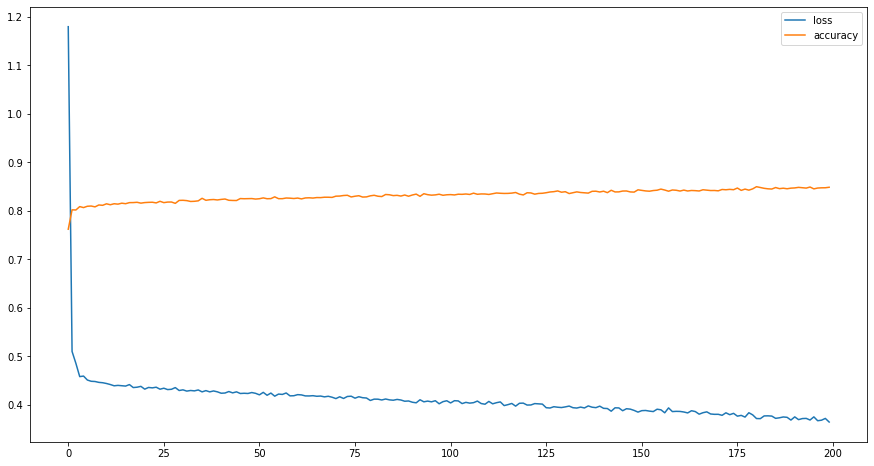

In [9]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(15,8))

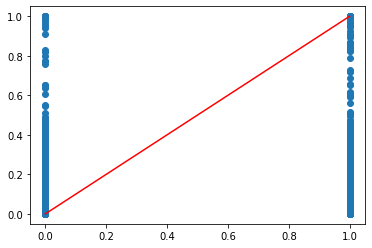

In [12]:
y_pred = model.predict(test_X)

from sklearn import metrics


fig = plt.pyplot.plot(figsize=(10,5))
plt.pyplot.scatter(test_Y,y_pred)

plt.pyplot.plot(test_Y,test_Y,'r')

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



y_pred = (y_pred >= 0.65).astype(int).ravel()
 

accuracy = accuracy_score(test_Y, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(test_Y, y_pred)
print('Precision: %f' % precision)

recall = recall_score(test_Y, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(test_Y, y_pred)
print('F1 score: %f' % f1)




Accuracy: 0.811121
Precision: 0.629630
Recall: 0.080000
F1 score: 0.141962
